# Data Preprocessing

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

In [22]:
# Data Preprocessing

# Pull in the data from the sheet
df = pd.read_csv('letter-recognition.data')

# Reindex columns
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege',
       'xegvy', 'y-ege', 'yegvx']

# Get all rows with their respective classes..
df_letters_H_and_K = df.loc[df['letter'].isin(['H', 'K'])]
df_letters_M_and_Y = df.loc[df['letter'].isin(['M', 'Y'])]
df_letters_S_and_L = df.loc[df['letter'].isin(['S', 'L'])]



In [23]:
# Split data into X and y
X_letters_H_and_K = df_letters_H_and_K.drop('letter', axis = 1)
y_letters_H_and_K = df_letters_H_and_K['letter']

X_letters_M_and_Y = df_letters_M_and_Y.drop('letter', axis = 1)
y_letters_M_and_Y = df_letters_M_and_Y['letter']

X_letters_S_and_L= df_letters_S_and_L.drop('letter', axis = 1)
y_letters_S_and_L = df_letters_S_and_L['letter']

# Scale the features
X_letters_H_and_K_scaled = scale(X_letters_H_and_K)
X_letters_M_and_Y_scaled = scale(X_letters_M_and_Y)
X_letters_S_and_L_scaled = scale(X_letters_S_and_L)

# Split the testing and training data
X_H_and_K_train, X_H_and_K_test, y_H_and_K_train, y_H_and_K_test = train_test_split(X_letters_H_and_K_scaled, y_letters_H_and_K, test_size = 0.1)
X_M_and_Y_train, X_M_and_Y_test, y_M_and_Y_train, y_M_and_Y_test = train_test_split(X_letters_M_and_Y_scaled, y_letters_M_and_Y, test_size = 0.1)
X_S_and_L_train, X_S_and_L_test, y_S_and_L_train, y_S_and_L_test = train_test_split(X_letters_S_and_L_scaled, y_letters_S_and_L, test_size = 0.1)

# Model Fitting

In [74]:
# Run SVM for H and K
hyperparameters = [1, 2, 3, 4, 5]

start = time.time()
print('H and K Model Fitting')
for value in hyperparameters:
    classifier = svm.SVC(kernel='linear', C=value).fit(X_H_and_K_train, y_H_and_K_train)
    scores = cross_val_score(classifier, X_H_and_K_test, y_H_and_K_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))
    


H and K Model Fitting
For the value C: 1
The scores are: [0.93333333 0.93333333 0.9        0.89655172 0.93103448]
The mean is: 0.9188505747126436
The standard deviation is: 0.016855450832021474



For the value C: 2
The scores are: [0.9        0.9        0.9        0.86206897 0.93103448]
The mean is: 0.8986206896551725
The standard deviation is: 0.0218741400374534



For the value C: 3
The scores are: [0.93333333 0.86666667 0.86666667 0.86206897 0.93103448]
The mean is: 0.8919540229885058
The standard deviation is: 0.03289847139310035



For the value C: 4
The scores are: [0.93333333 0.86666667 0.83333333 0.86206897 0.93103448]
The mean is: 0.8852873563218392
The standard deviation is: 0.03996563459696686



For the value C: 5
The scores are: [0.93333333 0.86666667 0.83333333 0.86206897 0.89655172]
The mean is: 0.8783908045977011
The standard deviation is: 0.03400745218432615






Elapsed time: 0.22620630264282227


In [62]:
# Run SVM for M and Y

print('M and Y Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = svm.SVC(kernel='linear', C=value).fit(X_M_and_Y_train, y_M_and_Y_train)
    scores = cross_val_score(classifier, X_M_and_Y_test, y_M_and_Y_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

M and Y Model Fitting
For the value C: 1
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 2
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 3
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 4
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 5
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0






Elapsed time: 0.05604982376098633


In [63]:
# Run SVM for S and L

print('S and L Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = svm.SVC(kernel='linear', C=value).fit(X_S_and_L_train, y_S_and_L_train)
    scores = cross_val_score(classifier, X_S_and_L_test, y_S_and_L_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

S and L Model Fitting
For the value C: 1
The scores are: [0.90322581 0.93333333 1.         0.9        0.9       ]
The mean is: 0.9273118279569893
The standard deviation is: 0.03844954409772236



For the value C: 2
The scores are: [0.96774194 0.93333333 1.         0.93333333 0.93333333]
The mean is: 0.9535483870967744
The standard deviation is: 0.026777432114018715



For the value C: 3
The scores are: [0.96774194 0.96666667 1.         0.9        0.96666667]
The mean is: 0.9602150537634409
The standard deviation is: 0.03270655962744922



For the value C: 4
The scores are: [0.93548387 0.96666667 1.         0.93333333 0.96666667]
The mean is: 0.9604301075268818
The standard deviation is: 0.024495369441194095



For the value C: 5
The scores are: [0.93548387 0.96666667 1.         0.93333333 0.93333333]
The mean is: 0.9537634408602151
The standard deviation is: 0.026356152601898553






Elapsed time: 0.10009098052978516


# Model Fitting with Dimension Reduction

In [41]:
# Sequential feature selection for all sets of data

# H and K:
clf = svm.SVC(kernel='linear', C=1)
sfs = SequentialFeatureSelector(clf, n_features_to_select=4)
sfs.fit(X_letters_H_and_K_scaled, y_letters_H_and_K)

# M and Y:
clf2 = svm.SVC(kernel='linear', C=1)
sfs2 = SequentialFeatureSelector(clf2, n_features_to_select=4)
sfs2.fit(X_letters_M_and_Y_scaled, y_letters_M_and_Y)

# S and L:
clf3 = svm.SVC(kernel='linear', C=1)
sfs3 = SequentialFeatureSelector(clf3, n_features_to_select=4)
sfs3.fit(X_letters_S_and_L_scaled, y_letters_S_and_L)

SequentialFeatureSelector(estimator=SVC(C=1, kernel='linear'),
                          n_features_to_select=4)

In [42]:
print(sfs.get_support())
print(sfs2.get_support())
print(sfs3.get_support())

[False False False False False False False  True False  True False  True
 False False False  True]
[False  True False  True False False False False False False False False
  True False False  True]
[False False False False False  True  True False False False False False
 False False  True  True]


In [43]:
# Reduce to the selected features
sfs.transform(X_letters_H_and_K_scaled)
sfs2.transform(X_letters_M_and_Y_scaled)
sfs3.transform(X_letters_S_and_L_scaled)

array([[ 0.64383347,  1.1431516 ,  1.28088509, -0.46342508],
       [ 0.64383347,  1.1431516 ,  1.28088509,  0.14572862],
       [-2.37338611, -1.77142971, -1.42493237,  0.14572862],
       ...,
       [ 0.64383347,  0.72678284,  0.67959232,  0.14572862],
       [-2.37338611, -1.77142971, -1.42493237,  0.14572862],
       [ 0.64383347,  0.72678284,  0.07829956,  0.14572862]])

In [44]:

# Split the testing and training data
X_H_and_K_train, X_H_and_K_test, y_H_and_K_train, y_H_and_K_test = train_test_split(X_letters_H_and_K_scaled, y_letters_H_and_K, test_size = 0.1)
X_M_and_Y_train, X_M_and_Y_test, y_M_and_Y_train, y_M_and_Y_test = train_test_split(X_letters_M_and_Y_scaled, y_letters_M_and_Y, test_size = 0.1)
X_S_and_L_train, X_S_and_L_test, y_S_and_L_train, y_S_and_L_test = train_test_split(X_letters_S_and_L_scaled, y_letters_S_and_L, test_size = 0.1)


In [64]:
# Rerun the models on the dimension reduced datasets
print('H and K Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = svm.SVC(kernel='linear', C=value).fit(X_H_and_K_train, y_H_and_K_train)
    scores = cross_val_score(classifier, X_H_and_K_test, y_H_and_K_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n") 

end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

H and K Model Fitting
For the value C: 1
The scores are: [0.93333333 0.93333333 0.9        0.89655172 0.93103448]
The mean is: 0.9188505747126436
The standard deviation is: 0.016855450832021474



For the value C: 2
The scores are: [0.9        0.9        0.9        0.86206897 0.93103448]
The mean is: 0.8986206896551725
The standard deviation is: 0.0218741400374534



For the value C: 3
The scores are: [0.93333333 0.86666667 0.86666667 0.86206897 0.93103448]
The mean is: 0.8919540229885058
The standard deviation is: 0.03289847139310035



For the value C: 4
The scores are: [0.93333333 0.86666667 0.83333333 0.86206897 0.93103448]
The mean is: 0.8852873563218392
The standard deviation is: 0.03996563459696686



For the value C: 5
The scores are: [0.93333333 0.86666667 0.83333333 0.86206897 0.89655172]
The mean is: 0.8783908045977011
The standard deviation is: 0.03400745218432615






Elapsed time: 0.22320175170898438


In [65]:
print('M and Y Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = svm.SVC(kernel='linear', C=value).fit(X_M_and_Y_train, y_M_and_Y_train)
    scores = cross_val_score(classifier, X_M_and_Y_test, y_M_and_Y_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

M and Y Model Fitting
For the value C: 1
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 2
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 3
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 4
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0



For the value C: 5
The scores are: [1. 1. 1. 1. 1.]
The mean is: 1.0
The standard deviation is: 0.0






Elapsed time: 0.05705094337463379


In [66]:
print('S and L Model Fitting')

start = time.time()
for value in hyperparameters:
    classifier = svm.SVC(kernel='linear', C=value).fit(X_S_and_L_train, y_S_and_L_train)
    scores = cross_val_score(classifier, X_S_and_L_test, y_S_and_L_test, cv=5)
    print("For the value C: {}".format(value))
    print("The scores are: {}".format(scores))
    print("The mean is: {}".format(scores.mean()))
    print("The standard deviation is: {}".format(scores.std()))
    print("\n\n")
    
end = time.time()
print("\n\n")
print("Elapsed time: {}".format(end-start))

S and L Model Fitting
For the value C: 1
The scores are: [0.90322581 0.93333333 1.         0.9        0.9       ]
The mean is: 0.9273118279569893
The standard deviation is: 0.03844954409772236



For the value C: 2
The scores are: [0.96774194 0.93333333 1.         0.93333333 0.93333333]
The mean is: 0.9535483870967744
The standard deviation is: 0.026777432114018715



For the value C: 3
The scores are: [0.96774194 0.96666667 1.         0.9        0.96666667]
The mean is: 0.9602150537634409
The standard deviation is: 0.03270655962744922



For the value C: 4
The scores are: [0.93548387 0.96666667 1.         0.93333333 0.96666667]
The mean is: 0.9604301075268818
The standard deviation is: 0.024495369441194095



For the value C: 5
The scores are: [0.93548387 0.96666667 1.         0.93333333 0.93333333]
The mean is: 0.9537634408602151
The standard deviation is: 0.026356152601898553






Elapsed time: 0.09890627861022949


# Results

#### Cross Validation Results without Dimension Reduction

###### H vs K

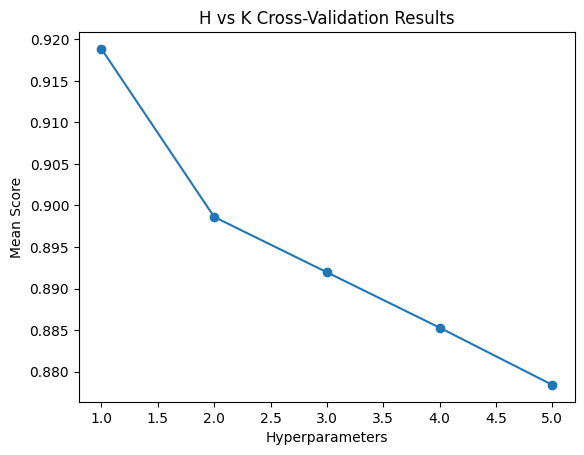

In [68]:
cv_scores = [0.9188505747126436, 0.8986206896551725, 0.8919540229885058, 
         0.8852873563218392, 0.8783908045977011]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('H vs K Cross-Validation Results')

plt.show()

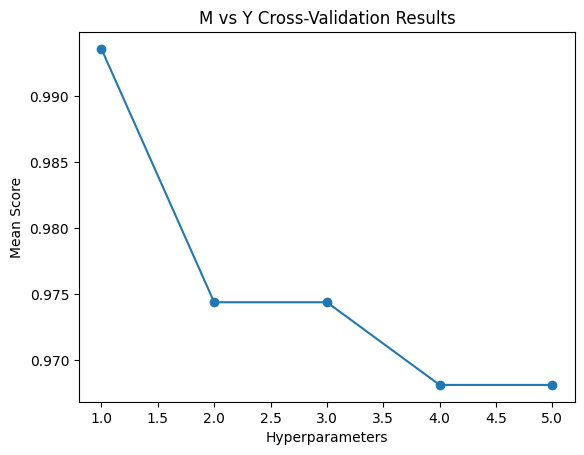

In [69]:
cv_scores = [0.9935483870967742, 0.9743951612903226, 0.9743951612903226, 
         0.9681451612903226, 0.9681451612903226]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('M vs Y Cross-Validation Results')

plt.show()

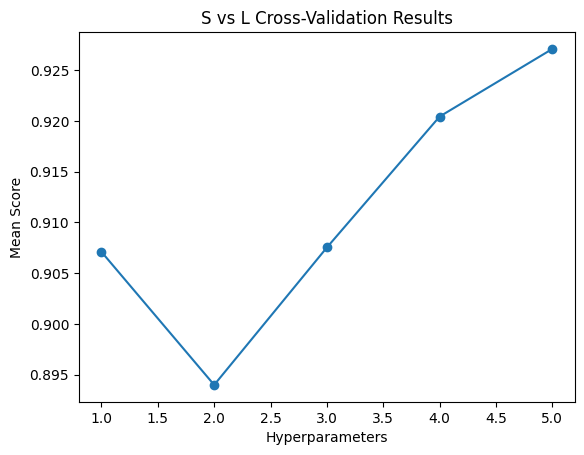

In [70]:
cv_scores = [0.9070967741935483, 0.8939784946236559, 0.9075268817204301, 
         0.9204301075268816, 0.9270967741935484]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('S vs L Cross-Validation Results')

plt.show()

#### Cross Validation Results With Dimension Reduction

###### H vs K

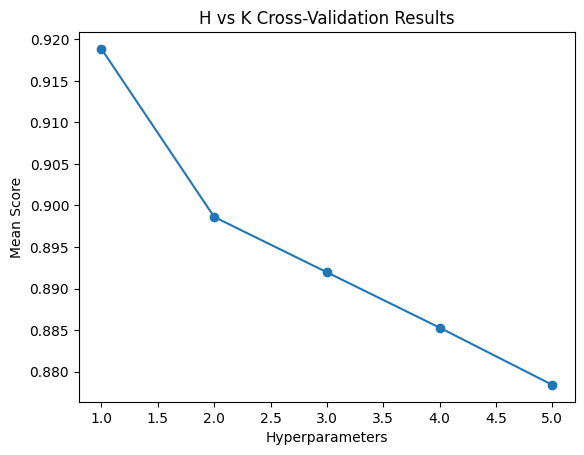

In [71]:
cv_scores = [0.9188505747126436, 0.8986206896551725, 0.8919540229885058, 
         0.8852873563218392, 0.8783908045977011]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('H vs K Cross-Validation Results')

plt.show()

###### M vs Y

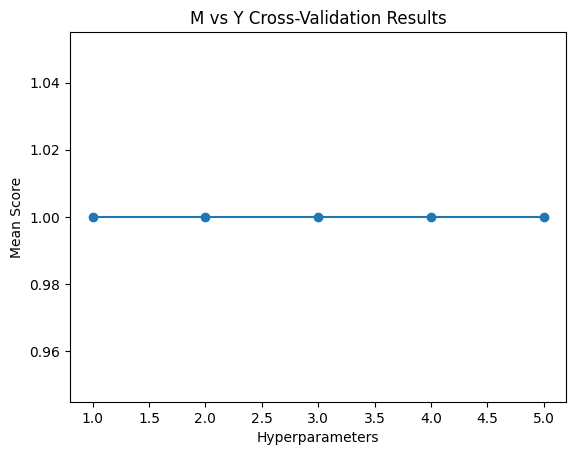

In [73]:
cv_scores = [1.0, 1.0, 1.0, 
         1.0, 1.0]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('M vs Y Cross-Validation Results')

plt.show()

###### S vs L

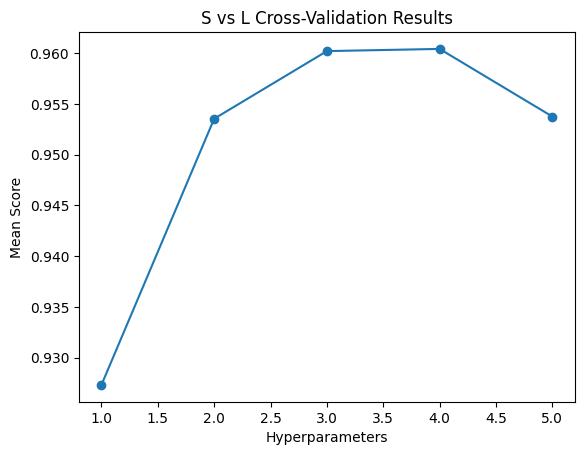

In [67]:
cv_scores = [0.9273118279569893, 0.9535483870967744, 0.9602150537634409, 
         0.9604301075268818, 0.9537634408602151]

plt.plot(hyperparameters, cv_scores, marker='o')

plt.xlabel('Hyperparameters')
plt.ylabel('Mean Score')

plt.title('S vs L Cross-Validation Results')

plt.show()